In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("./Data/creditcard.csv")
# Data downloaded from : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: >

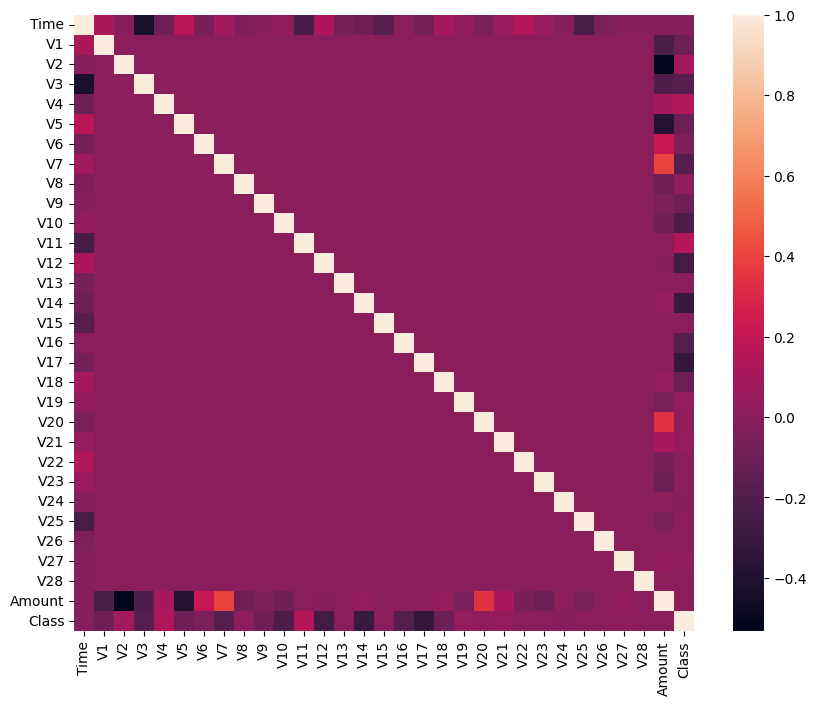

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), linewidths=0, ax=ax)
# /shrug 

In [4]:
rank = data.corr()["Class"]
dfRank = pd.DataFrame(rank)
dfRank = np.abs(dfRank).sort_values(by='Class',ascending=False)
dfRank

,Class
Class,1.000000
V17,0.326481
V14,0.302544
V12,0.260593
V10,0.216883
V16,0.196539
V3,0.192961
V7,0.187257
V11,0.154876
V4,0.133447


In [9]:
X = data.drop(["Class", "Time"], axis =1 ) 
X = data[dfRank.index[1:11]]
Y = data["Class"]
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state=11, test_size=0.3)

In [10]:
Model = SVC(kernel='linear')
Model.fit(X_train, Y_train)

SVC(kernel='linear')

In [11]:
predictions = Model.predict(X_test)

<Axes: >

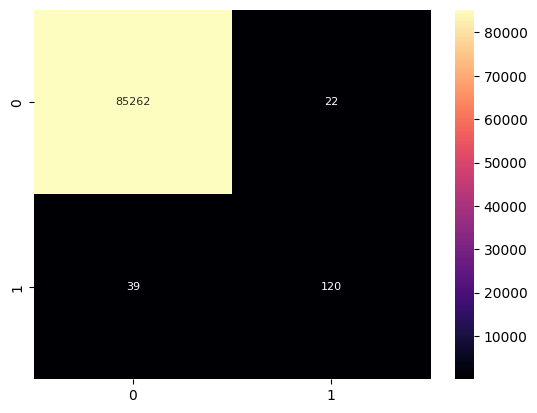

In [20]:
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, annot_kws={"size":8}, cmap="magma", fmt = "g")